In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pilimages/opera_house.jpg
/kaggle/input/bridge-image/sydney_bridge.png


## Using PIL libray for images

In [3]:
from PIL import Image
image = Image.open('../input/pilimages/opera_house.jpg')
print(image.format)
print(image.mode)
print(image.size)

JPEG
RGB
(640, 360)


## Using matplotlib for images

uint8
(360, 640, 3)


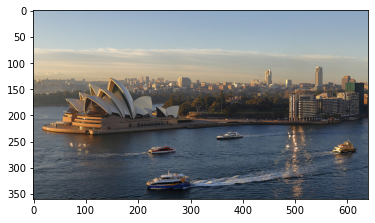

In [4]:
import matplotlib.pyplot as plt
import numpy as np

img_arr = np.asarray(image)
print(img_arr.dtype)
print(img_arr.shape)
plt.imshow(img_arr)

## Convert image from array back to Image object

In [5]:
img = Image.fromarray(img_arr)
print(img.mode)
print(img.size) # Width and height
print(img.format)

RGB
(640, 360)
None


## Saving Images

In [6]:
image.save('opera_house.png', format='PNG')

In [7]:
new_img = Image.open('./opera_house.png')
print(new_img.format)
print(new_img.size)
print(new_img.mode)

PNG
(640, 360)
RGB


## Convert image to grayscale

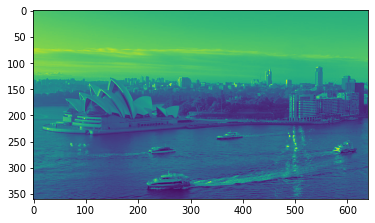

In [8]:
from PIL import ImageOps
gray_img = ImageOps.grayscale(new_img)
# gray_img = new_img.convert(model='L')

gray_img_arr = np.asarray(gray_img)
plt.imshow(gray_img_arr)

## Resizing

In [9]:
'''
Current image dim width x height (640,360). thumbnail will resize the bigger dim i.e 640 to 100
and other dim will be rescaled to maintain aspect ratio.

Standard resampling algorithms are used to invent or remove pixels when resizing, and you can specify
a technique, although default is a bicubic resampling algorithm that suits most general applications
'''

new_img.thumbnail((100,100)) 
## new_img.resize((200,200)) in case we dont want to preserve the aspect ratio

print('old image dim {}  and new img dim  {}'.format(image.size,new_img.size))

old image dim (640, 360)  and new img dim  (100, 56)


## Flip Image

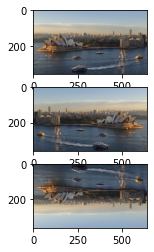

In [10]:
## imshow() function can plot the Image object directly without having to convert it to a NumPy array

hoz_flip = image.transpose(Image.FLIP_LEFT_RIGHT)
ver_flip = image.transpose(Image.FLIP_TOP_BOTTOM)
plt.subplot(3,1,1)
plt.imshow(image)
plt.subplot(3,1,2)
plt.imshow(hoz_flip)
plt.subplot(3,1,3)
plt.imshow(ver_flip)

## Rotate Image

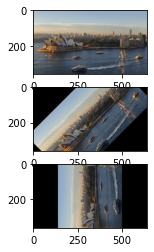

In [11]:
'''
In both rotations, the pixels are clipped to the original dimensions of the image
and the empty pixels are filled with black color.

'''

plt.subplot(3,1,1)
plt.imshow(image)
plt.subplot(3,1,2)
plt.imshow(image.rotate(45))
plt.subplot(3,1,3)
plt.imshow(image.rotate(90))

## Crop Image

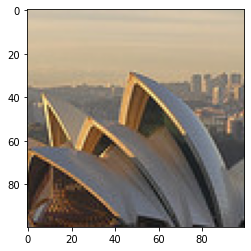

In [12]:
'''
here we created a cropped square image of 100 pixels starting at 100,100 and
extending down and left to 200,200.
'''

cropped_img = image.crop((100,100,200,200))
plt.imshow(cropped_img)

## Preparing image data for modeling with deep learning neural networks. 

In [13]:
image = Image.open('../input/bridge-image/sydney_bridge.png')
print(image.format)
print(image.mode)
print(image.size)

PNG
RGBA
(1280, 856)


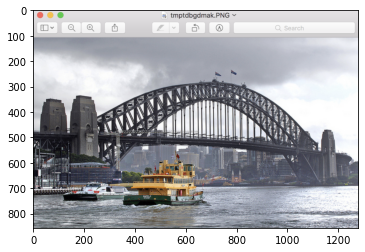

In [14]:
plt.imshow(image)

## Normalizing pixel values

Neural networks process inputs using small weight values, and inputs with large integer values can
disrupt or slow down the learning process

In [15]:
img_arr = np.asarray(image)
print('Type %s' % (img_arr.dtype))
print('min pixel value %s and max pixel value %s' % (img_arr.min(), img_arr.max()))
img_arr = img_arr.astype('float32')
print('Type : %s' % (img_arr.dtype))
img_arr = img_arr / 255.
print('min pixel value %.3f and max pixel value %.3f' % (img_arr.min(), img_arr.max()))

Type uint8
min pixel value 0 and max pixel value 255
Type : float32
min pixel value 0.000 and max pixel value 1.000


## Centering pixel values

1. A popular data preparation technique for image data is to subtract the mean value from the pixel values. This approach is called centering, because the distribution of the pixel values is centered on the value of zero

2. Centering the pixels then normalizing will mean that the pixel values will be centered close to 0.5. Centering after normalization will mean that the pixels will have positive and negative values, in which case images will not display correctly.

3. The mean can be calculated for all pixels in the image, referred to as a global centering, or it can be calculated for each channel in the case of color images, referred to as local centering.

4. For models trained on images centered using these means that may be used for transfer learning on new tasks, it can be beneficial or even required to normalize images for the new task using the same means.

## Global Centering

In [16]:
image = Image.open('../input/pilimages/opera_house.jpg')
img_arr = np.asarray(image)
img_arr = img_arr.astype('float32')
mean = img_arr.mean()
print('Mean : %.3f' % (mean))
print('Min : %.3f and Max: %.3f' % (img_arr.min(), img_arr.max()))

## Applying global centering 
print('\nAfter applying global centering\n')
img_arr = img_arr - mean
mean = img_arr.mean()
print('Mean : %.3f' % (mean))
print('Min: %.3f and Max: %.3f' % (img_arr.min(), img_arr.max()))

Mean : 116.704
Min : 0.000 and Max: 255.000

After applying global centering

Mean : -0.000
Min: -116.704 and Max: 138.296


## local Centering

In [20]:
img1 = np.asarray(image)
img1 = img1.astype('float32')
means = img1.mean(axis=(0,1), dtype='float64') # returns means for all channels
print('Mean: %s' % (means))
print('Min: %s and Max: %s' % (img1.min(axis=(0,1)), img1.max(axis=(0,1))))

# Local centering
img1 = img1 - means
print('Mean: %s' % (means))
print('Min: %s and Max: %s' % (img1.min(axis=(0,1)), img1.max(axis=(0,1))))

Mean: [113.34065104 117.16025608 119.61110677]
Min: [0. 0. 0.] and Max: [255. 255. 255.]
Mean: [113.34065104 117.16025608 119.61110677]
Min: [-113.34065104 -117.16025608 -119.61110677] and Max: [141.65934896 137.83974392 135.38889323]


## Standardising Pixel Values

1. Here we transform the distribution of pixel values to be a standard Gaussian: that is both centering the pixel values on zero and normalizing the values by the standard deviation. We get a standard Gaussian of pixel values with a mean of 0.0 and a standard deviation of 1.0.

2. Standardization may be preferred to normalization and centering alone and it results in both zero-centered values and small input values, roughly in the range -3 to 3, depending on the specifics of the dataset.

## Golbal Standardisation

In [22]:
img2 = np.asarray(image)
img2 = img2.astype('float32')
mean, std = img2.mean(), img2.std()
print('Mean %.3f and Std: %.3f' % (mean, std))
img2 = (img2 - mean)/std
mean, std = img2.mean(), img2.std()
print('Mean: %.3f and Std: %.3f' % (mean, std))

Mean 116.704 and Std: 56.645
Mean: -0.000 and Std: 1.000


## Positive Global Standardisation

### Why need of positive global standardisation

We may need to maintain the pixel values in the positive domain, so the images
can be visualized or perhaps for the benefit of a chosen activation function in the model. A
popular way of achieving this is to clip the standardized pixel values to the range [-1, 1] and then
rescale the values from [-1,1] to [0,1]. 

In [26]:
# clipping the pixel values
img2 = np.clip(img2, -1.0,1.0)

# Rescale them to [0,1]
img2 = (img2 + 1.0)/2.0
mean, std = img2.mean(), img2.std()
print('Mean: %.3f and Std: %.3f' % (mean, std))
print('Min: %.3f and Max: %.3f' % (img2.min(), img2.max()))

Mean: 0.936 and Std: 0.051
Min: 0.875 and Max: 1.000


## Local Standardisation

In [28]:
img3 = np.asarray(image)
img3 = img3.astype('float32')
means, stds = img3.mean(axis=(0,1), dtype='float64'), img3.std(axis=(0,1), dtype='float64')
print('Means: %s and Std: %s' % (means, stds))

# Local standardisation
img3 = (img3 - means)/stds

means, stds = img3.mean(axis=(0,1), dtype='float64'), img3.std(axis=(0,1), dtype='float64')
print('Means: %s and Std: %s' % (means, stds))

Means: [113.34065104 117.16025608 119.61110677] and Std: [57.56467512 56.52481878 55.652794  ]
